# Create bounding box geopackage for Jackson Creek DEM

In [8]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import xdem
from shapely.geometry import Polygon

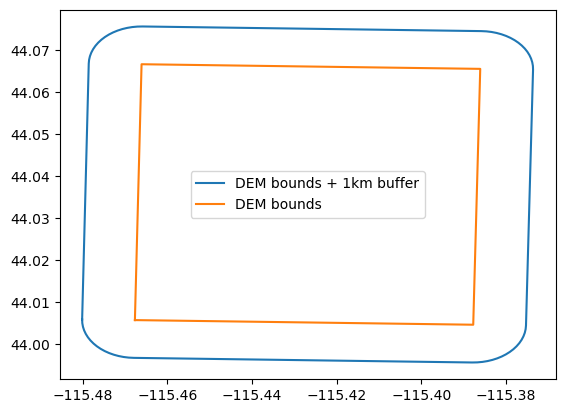

Bounds saved to file: /Volumes/LaCie/raineyaberle/Research/PhD/SkySat-Stereo/study-sites/JacksonCreek/20240420/JacksonCreek_20240420_DEM_bounds_buffer1km.shp


In [24]:
dem_fn = '/Volumes/LaCie/raineyaberle/Research/PhD/SkySat-Stereo/study-sites/JacksonCreek/20240420/JacksonCreek_20240420_DEM.tif'
shp_fn = dem_fn.replace('.tif', '_bounds_buffer1km.shp')

dem = xdem.DEM(dem_fn)
bounds, crs = dem.bounds, f"EPSG:{dem.crs.to_epsg()}"
poly = Polygon([[bounds.left, bounds.bottom], 
                [bounds.right, bounds.bottom], 
                [bounds.right, bounds.top],
                [bounds.left, bounds.top],
                [bounds.left, bounds.bottom]])
gdf = gpd.GeoDataFrame(geometry=[poly], crs=crs)
gdf_buffer = gdf.buffer(1e3)
gdf = gdf.to_crs("EPSG:4326")
gdf_buffer = gdf_buffer.to_crs("EPSG:4326")

fig, ax = plt.subplots()
ax.plot(*gdf_buffer.geometry[0].exterior.coords.xy, label='DEM bounds + 1km buffer')
ax.plot(*gdf.geometry[0].exterior.coords.xy, label='DEM bounds')
ax.legend()
plt.show()

gdf_buffer.to_file(shp_fn)
print('Bounds saved to file:', shp_fn)


In [25]:
gdf_buffer.bounds

,minx,miny,maxx,maxy
0,-115.480128,43.995543,-115.37357,44.075629
